In [5]:
# VERİ SETİNİ İŞLEME #

In [1]:
import csv
import re
import ast # for string to dict


# CSV dosyasını yazma modunda açılır
with open('genel_arac_verileri_X_li.csv', mode='w', newline='') as dosya:
    veri_yazici = csv.writer(dosya)

    # Başlık satırı yazılır 
    veri_yazici.writerow(['ilan_id', 'ilan_konumu','ilan_tarihi','model_yili','fiyat','model',
                          'motor_boyutu','motor_gucu','marka','seri','kullanim','yakit','sanziman_turu'])

    with open('arac_ilanlari.csv', 'r',encoding='utf-8') as dosya1:
        csv_okuyucu = csv.reader(dosya1)


        sutun_verileri_arac_oz = []
        sutun_verileri_ilan_id = []
        sutun_verileri_ilan_konumlar = []
        sutun_verileri_ilan_tarihi = []
        sutun_verileri_ilan_fiyat = []
        sutun_verileri_arac_tagler = []
        satır_verileri = []

        for satir in csv_okuyucu:
            satır_verileri.append(satir)
            sutun_verisi_arac_oz = satir[8]
            sutun_verileri_arac_oz.append(sutun_verisi_arac_oz)
            sutun_verisi_ilan_id = satir[0]
            sutun_verileri_ilan_id.append(sutun_verisi_ilan_id)
            sutun_verisi_ilan_konum = satir[7]
            sutun_verileri_ilan_konumlar.append(sutun_verisi_ilan_konum),
            sutun_verisi_ilan_tarih = satir[4]
            sutun_verileri_ilan_tarihi.append(sutun_verisi_ilan_tarih)
            sutun_verisi_ilan_fiyat = satir[2]
            sutun_verileri_ilan_fiyat.append(sutun_verisi_ilan_fiyat)
            sutun_verileri_arac_tag = satir[6]
            sutun_verileri_arac_tagler.append(sutun_verileri_arac_tag)
            
            
        for özellik,ilan_id,ilan_konumu,ilan_tarihi,fiyat,arac_tag in zip(sutun_verileri_arac_oz,sutun_verileri_ilan_id,sutun_verileri_ilan_konumlar,
                                                                          sutun_verileri_ilan_tarihi,sutun_verileri_ilan_fiyat,sutun_verileri_arac_tagler): # zip ile birden dizide aynı anda gezilir 
            
            if özellik == 'arac_ozellikleri' and ilan_tarihi == 'ilan_tarihi' and ilan_id == "ilan_id" and fiyat == "fiyat" and arac_tag == "arac_tagleri":
                continue  
            else:
                
                # ilan_konumu verilerini ayırma
                ilan_konum = ilan_konumu.split(",")[0] # sadece şehri dikkate aldım
                #print(ilan_konum)

                ilan_tarihi = ilan_tarihi  # aracın ilan tarihi
                
                
                # arac_ozellikleri sutunu icin verileri ayırma / *** re kullanıldı
                arac_ozellikler_dizi = []
                #print("------",özellik)
                arac_ozelligin_alacagimiz_veri = özellik
                tirnak_ici_veriler = re.findall(r"'(.*?)'", arac_ozelligin_alacagimiz_veri)
                #print("****",tirnak_ici_veriler)
                for veri in tirnak_ici_veriler:
                    #print("--",veri)
                    arac_ozellikler_dizi.append(veri)
        

        
                # arac_tagleri sutunu icin veri ayırma
                #print("**",type(arac_tag))
                arac_tag_dict = ast.literal_eval(arac_tag) # string to dict
                #print("----------",type(arac_tag_dict)) 
                # arac_tagleri eksik veri icin kontrol

               
                if(len(arac_tag_dict) == 3):
                    #print(arac_tag_dict["Marka"]) 
                    marka = arac_tag_dict["Marka"]
                    seri = arac_tag_dict["Seri"]
                    model = arac_tag_dict["Model"]

                    # Regular expression deseni: bir sayı, ardından bir nokta, sonra bir sayı
                    aranan = re.compile(r'\d+\.\d+')
                    # Diziyi tarayarak desene uyan ilk eşleşmeyi bulma
                    bulunan = re.search(aranan, model)
                    # Eğer eşleşme varsa, değeri al; yoksa None döndür
                    motor_boyutu = bulunan.group() if bulunan else "XXXX"
                    #print(motor_boyutu)

                else:
                    model = "XXXX"
                    motor_boyutu = "XXXX"
                    marka = "XXXX"
                    seri = "XXXX"
                
                # arac_ozdellileri eksik veri icin kontrol
                if(len(arac_ozellikler_dizi) < 5):
                    model_yil = "XXXX"  
                    arac_yas = "XXXX"  
                    kullanim = "XXXX"
                    motor_gucu = "XXXX"
                    yakit = "XXXX"
                    sanziman_turu = "XXXX"
                else:
                    kullanim = (arac_ozellikler_dizi[0].replace('.', '')).split(" ")[0]  # km yazsından arındırma 
                    #print(kullanim)
                    model_yil = int(arac_ozellikler_dizi[1][:4]) # sadece yıl
                    

                    yakit = arac_ozellikler_dizi[2]
                    sanziman_turu = arac_ozellikler_dizi[4]
                
                    # motor_gucu için 90 - 100 gibi ifadeleri sildim yerine "XXXX" yazdım
                    motor_guc = arac_ozellikler_dizi[3]
                    # Regular expression deseni: bir sayı, ardından bir kısa çizgi, sonra bir sayı
                    aranan_motor_gucu = re.compile(r'\d+\-\d+')
                    # Diziyi tarayarak desene uyan ilk eşleşmeyi bulma
                    match = re.search(aranan_motor_gucu, motor_guc)
                    # Eğer eşleşme varsa, "XXXX" yaz; yoksa kendi değerini yazar döndür
                    motor_guc_deger = (arac_ozellikler_dizi[3].split(" "))[0]

                    if match is not None:
                        motor_gucu = "XXXX"
                    else:
                        motor_gucu = motor_guc_deger
                        #print(motor_gucu)
                        
                    
                veri_yazici.writerow([ilan_id, ilan_konum, ilan_tarihi, model_yil, fiyat, model, 
                                      motor_boyutu, motor_gucu, marka, seri, kullanim, yakit, sanziman_turu])
                
print("Genel veriler CSV dosyasına yazıldı.")

# YILLARA GÖRE DE AYRILABİLİR 



Genel veriler CSV dosyasına yazıldı.


In [1]:
# XXXX'li satrılar silindi / # EKSİK VERİ TEMİZLEME #

import csv

# CSV dosyasını oku
with open('genel_arac_verileri_X_li.csv', 'r', newline='') as dosya:
    csv_okuyucu = csv.reader(dosya)
    satirlar = list(csv_okuyucu)

new_satirlar = []
for satir in satirlar:
    if(satir[0] == 'XXXX'):
        continue
    elif(satir[1] == 'XXXX'):
        continue
    elif(satir[2] == 'XXXX'):
        continue
    elif(satir[3] == 'XXXX'):
        continue
    elif(satir[4] == 'XXXX'):
        continue
    elif(satir[5] == 'XXXX'):
        continue
    elif(satir[6] == 'XXXX'):
        continue
    elif(satir[7] == 'XXXX'):
        continue
    elif(satir[8] == 'XXXX'):
        continue
    elif(satir[9] == 'XXXX'):
        continue
    elif(satir[10] == 'XXXX'):
        continue
    elif(satir[11] == 'XXXX'):
        continue
    elif(satir[12] == 'XXXX'):
        continue
    else:
        new_satirlar.append(satir)
           
with open('genel_arac_verileri_X_siz.csv', 'w', newline='') as dosya:
    csv_yazici = csv.writer(dosya)
    csv_yazici.writerows(new_satirlar)        

print("X'li değerler silindi ve yeni CSV dosyası oluşturuldu.")


X'li değerler silindi ve yeni CSV dosyası oluşturuldu.


In [206]:
# İSTENMEYEN SÜTRUNLARI KALDIRMA #
import pandas as pd

# CSV dosyasını yükle
df = pd.read_csv('genel_arac_verileri_X_siz.csv')

# Silmek istediğiniz sütunu belirtin (örneğin, 'Silinecek_Sutun')
silinecek_sutun1 = 'yipranma_degeri'
silinecek_sutun2 = 'ilan_id'
df.drop(silinecek_sutun1, axis=1, inplace=True)
df.drop(silinecek_sutun2, axis=1, inplace=True)

# Yeni CSV dosyasını oluştur
df.to_csv('genel_arac_verileri_duzenli.csv', index=False)

print("Gereksiz sütunlar silindi ve yeni CSV dosyası oluşturuldu.")

In [207]:
# AYKIRIR DEĞER TEMİZLEME #

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Bilimsel gösterimi devre dışı bırak
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# görselleştirme için kütüphaneler
import matplotlib.pyplot as plt
import seaborn as sns

# grafik için ayarlamalar
sns.set_theme()
sns.set(rc={"figure.dpi":200, "figure.figsize":(4,2)})

In [4]:

df = pd.read_csv("genel_arac_verileri_X_siz.csv")

In [5]:
df

,ilan_id,ilan_konumu,ilan_tarihi,model_yili,fiyat,model,motor_boyutu,motor_gucu,marka,seri,kullanim,yakit,sanziman_turu
0,1080850207,�stanbul,2023-05-26 09:23:29.000000,2016,830000.00,1.5 dCi Icon,1.50,110,Renault,Megane,143000,Dizel,Otomatik
1,1101850722,�zmir,2023-05-26 09:23:13.000000,2017,905000.00,1.5 dCi Icon,1.50,110,Renault,Megane,80000,Dizel,Otomatik
2,1101855061,Adana,2023-05-26 09:22:58.000000,2011,695000.00,A3 Sportback 1.6,1.60,102,Audi,A3,177000,Benzin & LPG,Manuel
3,1090594643,K�rklareli,2023-05-26 09:21:55.000000,2015,530000.00,1.4 TDI Trendline,1.40,75,Volkswagen,Polo,125000,Dizel,Manuel
4,1101862946,�zmir,2023-05-26 09:21:08.000000,2013,685000.00,1.5 dCi Icon,1.50,110,Renault,Megane,90500,Dizel,Otomatik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540142,1101864569,Tokat,2023-05-26 09:28:13.000000,2007,360000.00,1.4 Authentique,1.40,98,Renault,Megane,235000,Benzin & LPG,Manuel
540143,1101751328,�stanbul,2023-05-26 09:27:09.000000,2016,720000.00,1.2 TSI Lounge,1.20,90,Volkswagen,Polo,57000,Benzin,Otomatik
540144,1101865698,Bitlis,2023-05-26 09:26:38.000000,2015,469500.00,1.4 TDI Trendline,1.40,75,Volkswagen,Polo,205000,Dizel,Manuel
540145,1101865188,Ordu,2023-05-26 09:26:09.000000,2020,997500.00,1.5 Blue DCI Touch,1.50,115,Renault,Megane,22000,Dizel,Otomatik


In [6]:
df.columns  # sütunları 

Index(['ilan_id', 'ilan_konumu', 'ilan_tarihi', 'model_yili', 'fiyat', 'model',
       'motor_boyutu', 'motor_gucu', 'marka', 'seri', 'kullanim', 'yakit',
       'sanziman_turu'],
      dtype='object')

In [7]:
df.shape # boyutu

(540147, 13)

In [8]:
df.isnull().sum()

ilan_id            0
ilan_konumu      286
ilan_tarihi        0
model_yili         0
fiyat              0
model              0
motor_boyutu       0
motor_gucu         0
marka              0
seri               0
kullanim           0
yakit              0
sanziman_turu      0
dtype: int64

<AxesSubplot:>

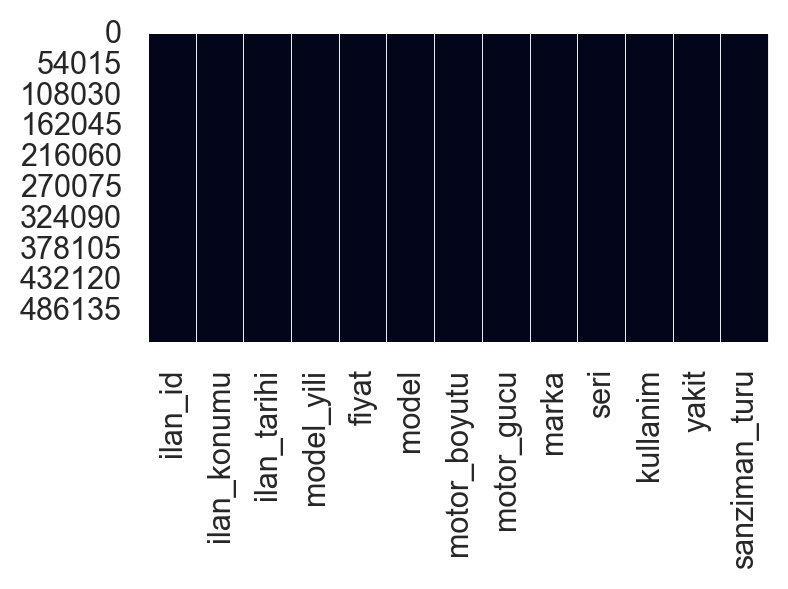

In [9]:
sns.heatmap(df.isnull(), cbar=False)  # eksik verilerin görselleştirilmesi 

In [10]:
# bulunan medyan değeri eksik veriler atanır  # amaa şuan yok gibi bizde 
#df["Fiyat"].fillna(fiyat_medyan, inplace=True)   # inplace=True  : değişikliklerin kaydedilmesi için

# az sayıdaki eksik veriler silinebilir # ilan_konumu vardı

df.dropna(inplace=True)

In [11]:
df.isnull().sum()

ilan_id          0
ilan_konumu      0
ilan_tarihi      0
model_yili       0
fiyat            0
model            0
motor_boyutu     0
motor_gucu       0
marka            0
seri             0
kullanim         0
yakit            0
sanziman_turu    0
dtype: int64

<AxesSubplot:>

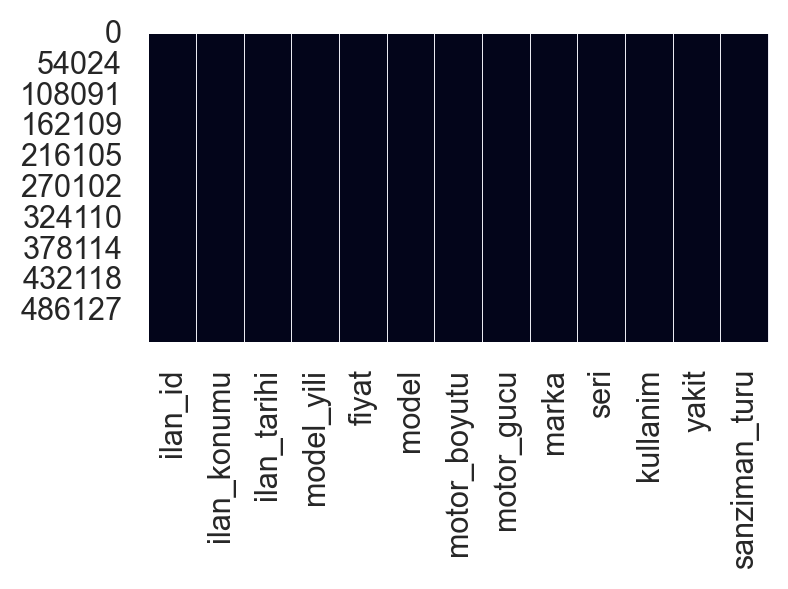

In [12]:
sns.heatmap(df.isnull(), cbar=False)  # eksik verilerin görselleştirilmesi # eksik veri olsaydı sütunlarda gösterilirdi

In [13]:
df.info()                                               # sütunlar hakkında bilgi 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539861 entries, 0 to 540146
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ilan_id        539861 non-null  int64  
 1   ilan_konumu    539861 non-null  object 
 2   ilan_tarihi    539861 non-null  object 
 3   model_yili     539861 non-null  int64  
 4   fiyat          539861 non-null  float64
 5   model          539861 non-null  object 
 6   motor_boyutu   539861 non-null  float64
 7   motor_gucu     539861 non-null  int64  
 8   marka          539861 non-null  object 
 9   seri           539861 non-null  object 
 10  kullanim       539861 non-null  int64  
 11  yakit          539861 non-null  object 
 12  sanziman_turu  539861 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 57.7+ MB


In [14]:
df.describe()

,ilan_id,model_yili,fiyat,motor_boyutu,motor_gucu,kullanim
count,539861.00,539861.00,539861.00,539861.00,539861.00,539861.00
mean,1088274068.87,2012.36,789122.95,1.46,102.58,155892.71
std,31653769.21,6.71,11102039.84,0.17,20.16,90221.40
min,552315197.00,1982.00,1.00,1.00,45.00,0.00
25%,1069342295.00,2007.00,350000.00,1.40,90.00,87820.00
50%,1093234993.00,2014.00,545000.00,1.50,105.00,150000.00
75%,1112334261.00,2017.00,785000.00,1.60,110.00,220000.00
max,1131802116.00,2023.00,1480000000.00,3.20,601.00,1000000.00


In [15]:
df["ilan_konumu"].describe() 

count       539861
unique        1665
top       �stanbul
freq        130778
Name: ilan_konumu, dtype: object

In [16]:
df["ilan_tarihi"].describe() 

count                         539861
unique                        507945
top       2023-06-05 18:31:09.000000
freq                               6
Name: ilan_tarihi, dtype: object

In [17]:
df["model"].describe()

count            539861
unique              256
top       1.5 dCi Touch
freq              41043
Name: model, dtype: object

In [18]:
df["marka"].describe()

count      539861
unique          6
top       Renault
freq       270903
Name: marka, dtype: object

In [19]:
df["seri"].describe() 

count     539861
unique         7
top       Megane
freq      270903
Name: seri, dtype: object

In [20]:
df["yakit"].describe()

count     539861
unique         4
top        Dizel
freq      281184
Name: yakit, dtype: object

In [21]:
df["sanziman_turu"].describe() 

count     539861
unique         3
top       Manuel
freq      256734
Name: sanziman_turu, dtype: object

In [22]:
df.corr()

,ilan_id,model_yili,fiyat,motor_boyutu,motor_gucu,kullanim
ilan_id,1.00,0.00,0.01,-0.02,0.01,0.02
model_yili,0.00,1.00,0.02,-0.42,0.37,-0.72
fiyat,0.01,0.02,1.00,-0.00,0.01,-0.02
motor_boyutu,-0.02,-0.42,-0.00,1.00,0.15,0.43
motor_gucu,0.01,0.37,0.01,0.15,1.00,-0.30
kullanim,0.02,-0.72,-0.02,0.43,-0.30,1.00


In [23]:
df.shape

(539861, 13)

In [24]:
df["model_yili"].describe()

count   539861.00
mean      2012.36
std          6.71
min       1982.00
25%       2007.00
50%       2014.00
75%       2017.00
max       2023.00
Name: model_yili, dtype: float64

<AxesSubplot:>

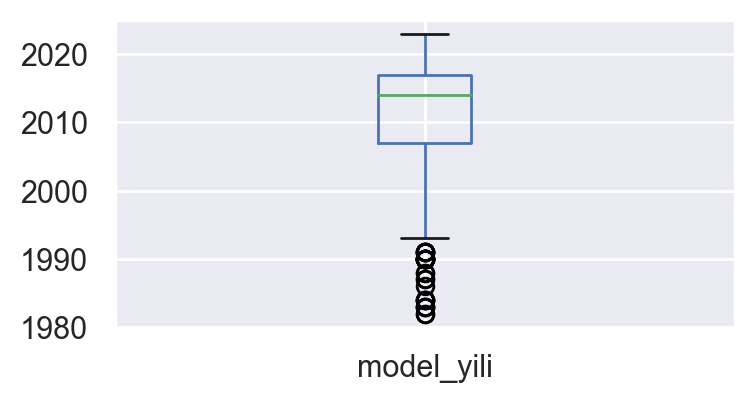

In [25]:
df['model_yili'].plot(kind='box') 

In [26]:
Q1 = df.model_yili.quantile(0.25)  # birinci çeyreği aldık
Q3 = df.model_yili.quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

(2007.0, 2017.0, 10.0)

In [27]:
aykiri_Q3tenbuyuk = Q3 + 1.5*IQR 
aykiri_Q1denkucuk = Q1 - 1.5*IQR

aykiri_Q3tenbuyuk, aykiri_Q1denkucuk

(2032.0, 1992.0)

In [28]:
# mantıksal sınamanın true olduğu durumaları döndürür
np.where(df["model_yili"] > 2032.0)[0].shape 

(0,)

In [29]:
np.where(df["model_yili"] < 1992.0)[0].shape 

(32,)

In [30]:
# AYKIRI VERİLERİ SİLEREK YENİ BİR VERİ SETİ OLUŞTURDUK
# Koşulu belirleyelim 
kosul = ~(df["model_yili"] < 1992.0)

# Koşulu sağlayan satırları ekrana yazdırma
df = df.loc[kosul]

<AxesSubplot:>

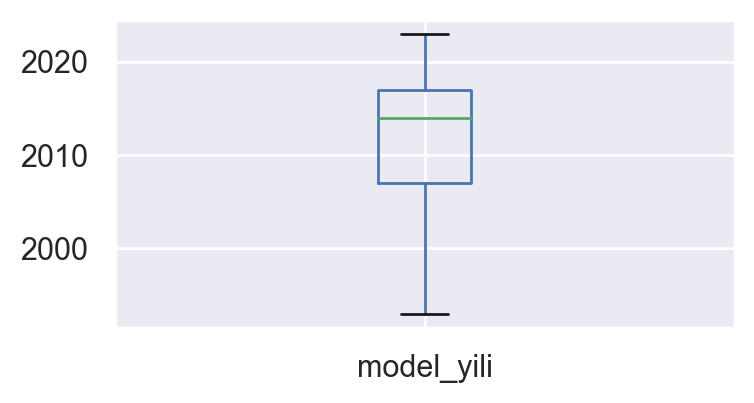

In [31]:
df['model_yili'].plot(kind='box') 

In [32]:
df

,ilan_id,ilan_konumu,ilan_tarihi,model_yili,fiyat,model,motor_boyutu,motor_gucu,marka,seri,kullanim,yakit,sanziman_turu
0,1080850207,�stanbul,2023-05-26 09:23:29.000000,2016,830000.00,1.5 dCi Icon,1.50,110,Renault,Megane,143000,Dizel,Otomatik
1,1101850722,�zmir,2023-05-26 09:23:13.000000,2017,905000.00,1.5 dCi Icon,1.50,110,Renault,Megane,80000,Dizel,Otomatik
2,1101855061,Adana,2023-05-26 09:22:58.000000,2011,695000.00,A3 Sportback 1.6,1.60,102,Audi,A3,177000,Benzin & LPG,Manuel
3,1090594643,K�rklareli,2023-05-26 09:21:55.000000,2015,530000.00,1.4 TDI Trendline,1.40,75,Volkswagen,Polo,125000,Dizel,Manuel
4,1101862946,�zmir,2023-05-26 09:21:08.000000,2013,685000.00,1.5 dCi Icon,1.50,110,Renault,Megane,90500,Dizel,Otomatik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540142,1101864569,Tokat,2023-05-26 09:28:13.000000,2007,360000.00,1.4 Authentique,1.40,98,Renault,Megane,235000,Benzin & LPG,Manuel
540143,1101751328,�stanbul,2023-05-26 09:27:09.000000,2016,720000.00,1.2 TSI Lounge,1.20,90,Volkswagen,Polo,57000,Benzin,Otomatik
540144,1101865698,Bitlis,2023-05-26 09:26:38.000000,2015,469500.00,1.4 TDI Trendline,1.40,75,Volkswagen,Polo,205000,Dizel,Manuel
540145,1101865188,Ordu,2023-05-26 09:26:09.000000,2020,997500.00,1.5 Blue DCI Touch,1.50,115,Renault,Megane,22000,Dizel,Otomatik


In [33]:
df["motor_boyutu"].describe()

count   539829.00
mean         1.46
std          0.17
min          1.00
25%          1.40
50%          1.50
75%          1.60
max          3.20
Name: motor_boyutu, dtype: float64

<AxesSubplot:>

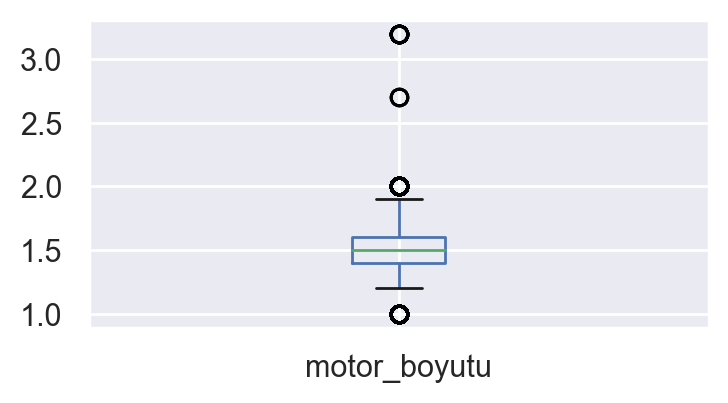

In [34]:
df['motor_boyutu'].plot(kind='box') 

In [35]:
Q1 = df.motor_boyutu.quantile(0.25)  
Q3 = df.motor_boyutu.quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

aykiri_Q3tenbuyuk = Q3 + 1.5*IQR 
aykiri_Q1denkucuk = Q1 - 1.5*IQR

aykiri_Q3tenbuyuk, aykiri_Q1denkucuk


(1.9000000000000004, 1.0999999999999996)

In [36]:
# mantıksal sınamanın true olduğu durumaları döndürür
np.where(df["motor_boyutu"] > 1.9000000000000004)[0].shape , np.where(df["motor_boyutu"] < 1.0999999999999996)[0].shape

((3978,), (28912,))

In [37]:
# AYKIRI VERİLERİ SİLEREK YENİ BİR VERİ SETİ OLUŞTURDUK
# Koşulu belirleyelim (örneğin, fiyat 1594000'den büyük olanları bulalım)

kosul = ~((df["motor_boyutu"] > 1.9000000000000004) | (df["motor_boyutu"] < 1.0999999999999996))

df = df.loc[kosul]

<AxesSubplot:>

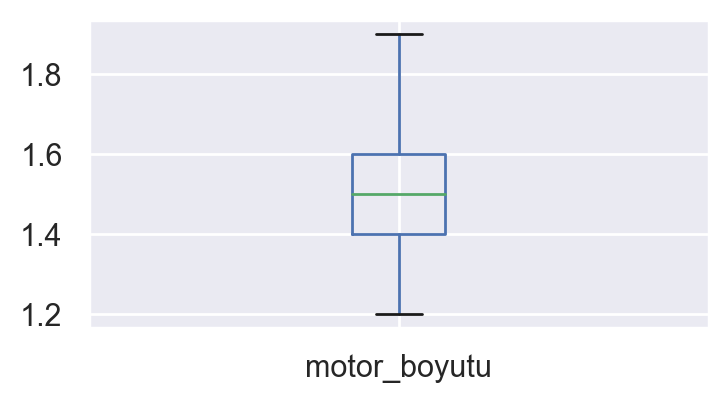

In [38]:
df['motor_boyutu'].plot(kind='box') 

In [40]:
df

,ilan_id,ilan_konumu,ilan_tarihi,model_yili,fiyat,model,motor_boyutu,motor_gucu,marka,seri,kullanim,yakit,sanziman_turu
0,1080850207,�stanbul,2023-05-26 09:23:29.000000,2016,830000.00,1.5 dCi Icon,1.50,110,Renault,Megane,143000,Dizel,Otomatik
1,1101850722,�zmir,2023-05-26 09:23:13.000000,2017,905000.00,1.5 dCi Icon,1.50,110,Renault,Megane,80000,Dizel,Otomatik
2,1101855061,Adana,2023-05-26 09:22:58.000000,2011,695000.00,A3 Sportback 1.6,1.60,102,Audi,A3,177000,Benzin & LPG,Manuel
3,1090594643,K�rklareli,2023-05-26 09:21:55.000000,2015,530000.00,1.4 TDI Trendline,1.40,75,Volkswagen,Polo,125000,Dizel,Manuel
4,1101862946,�zmir,2023-05-26 09:21:08.000000,2013,685000.00,1.5 dCi Icon,1.50,110,Renault,Megane,90500,Dizel,Otomatik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540142,1101864569,Tokat,2023-05-26 09:28:13.000000,2007,360000.00,1.4 Authentique,1.40,98,Renault,Megane,235000,Benzin & LPG,Manuel
540143,1101751328,�stanbul,2023-05-26 09:27:09.000000,2016,720000.00,1.2 TSI Lounge,1.20,90,Volkswagen,Polo,57000,Benzin,Otomatik
540144,1101865698,Bitlis,2023-05-26 09:26:38.000000,2015,469500.00,1.4 TDI Trendline,1.40,75,Volkswagen,Polo,205000,Dizel,Manuel
540145,1101865188,Ordu,2023-05-26 09:26:09.000000,2020,997500.00,1.5 Blue DCI Touch,1.50,115,Renault,Megane,22000,Dizel,Otomatik


In [41]:
df["motor_gucu"].describe()

count   506939.00
mean       102.93
std         20.29
min         45.00
25%         90.00
50%        105.00
75%        110.00
max        601.00
Name: motor_gucu, dtype: float64

<AxesSubplot:>

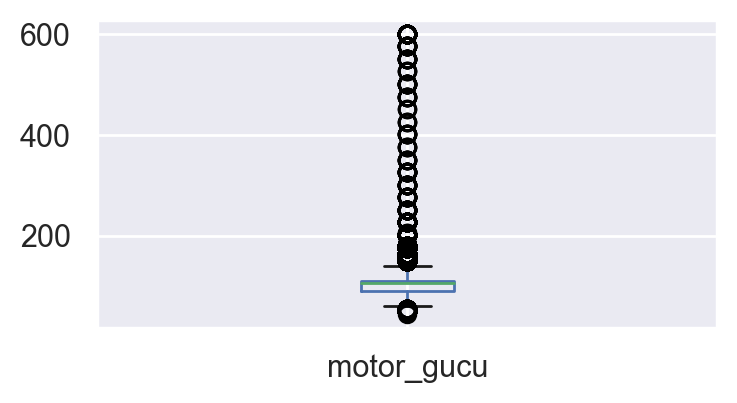

In [42]:
df['motor_gucu'].plot(kind='box') 

In [43]:
Q1 = df.motor_gucu.quantile(0.25)  
Q3 = df.motor_gucu.quantile(0.75)
IQR = Q3 - Q1

#Q1, Q3, IQR

aykiri_Q3tenbuyuk = Q3 + 1.5*IQR 
aykiri_Q1denkucuk = Q1 - 1.5*IQR

aykiri_Q3tenbuyuk, aykiri_Q1denkucuk

(140.0, 60.0)

In [44]:
# mantıksal sınamanın true olduğu durumaları döndürür
np.where(df["motor_gucu"] > 140.0)[0].shape , np.where(df["motor_gucu"] < 60.0)[0].shape

((4807,), (1405,))

In [45]:
# AYKIRI VERİLERİ SİLEREK YENİ BİR VERİ SETİ OLUŞTURDUK
# Koşulu belirleyelim (örneğin, fiyat 1594000'den büyük olanları bulalım)

kosul = ~((df["motor_gucu"] > 140.0) | (df["motor_gucu"] < 60.0))

df = df.loc[kosul]

<AxesSubplot:>

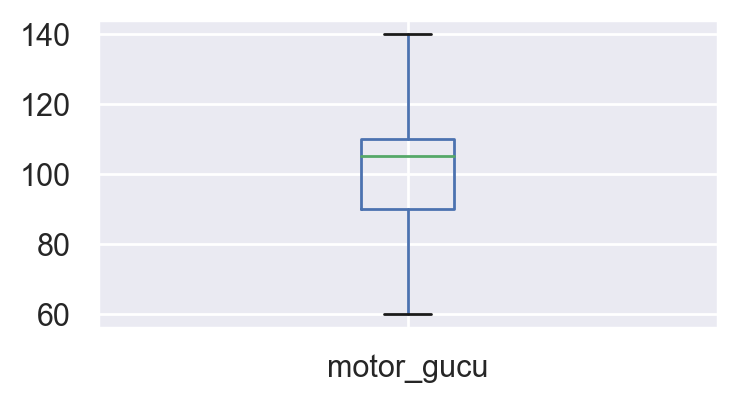

In [46]:
df['motor_gucu'].plot(kind='box')

In [47]:
df

,ilan_id,ilan_konumu,ilan_tarihi,model_yili,fiyat,model,motor_boyutu,motor_gucu,marka,seri,kullanim,yakit,sanziman_turu
0,1080850207,�stanbul,2023-05-26 09:23:29.000000,2016,830000.00,1.5 dCi Icon,1.50,110,Renault,Megane,143000,Dizel,Otomatik
1,1101850722,�zmir,2023-05-26 09:23:13.000000,2017,905000.00,1.5 dCi Icon,1.50,110,Renault,Megane,80000,Dizel,Otomatik
2,1101855061,Adana,2023-05-26 09:22:58.000000,2011,695000.00,A3 Sportback 1.6,1.60,102,Audi,A3,177000,Benzin & LPG,Manuel
3,1090594643,K�rklareli,2023-05-26 09:21:55.000000,2015,530000.00,1.4 TDI Trendline,1.40,75,Volkswagen,Polo,125000,Dizel,Manuel
4,1101862946,�zmir,2023-05-26 09:21:08.000000,2013,685000.00,1.5 dCi Icon,1.50,110,Renault,Megane,90500,Dizel,Otomatik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540142,1101864569,Tokat,2023-05-26 09:28:13.000000,2007,360000.00,1.4 Authentique,1.40,98,Renault,Megane,235000,Benzin & LPG,Manuel
540143,1101751328,�stanbul,2023-05-26 09:27:09.000000,2016,720000.00,1.2 TSI Lounge,1.20,90,Volkswagen,Polo,57000,Benzin,Otomatik
540144,1101865698,Bitlis,2023-05-26 09:26:38.000000,2015,469500.00,1.4 TDI Trendline,1.40,75,Volkswagen,Polo,205000,Dizel,Manuel
540145,1101865188,Ordu,2023-05-26 09:26:09.000000,2020,997500.00,1.5 Blue DCI Touch,1.50,115,Renault,Megane,22000,Dizel,Otomatik


In [48]:
df["marka"].describe()

count      500727
unique          6
top       Renault
freq       266521
Name: marka, dtype: object

In [49]:
df["seri"].describe()

count     500727
unique         6
top       Megane
freq      266521
Name: seri, dtype: object

In [50]:
df["yakit"].describe()

count     500727
unique         4
top        Dizel
freq      278586
Name: yakit, dtype: object

In [51]:
df["sanziman_turu"].describe()

count     500727
unique         3
top       Manuel
freq      243442
Name: sanziman_turu, dtype: object

In [52]:
df["kullanim"].describe()

count    500727.00
mean     161317.88
std       87850.20
min           0.00
25%       96000.00
50%      156000.00
75%      223000.00
max     1000000.00
Name: kullanim, dtype: float64

<AxesSubplot:>

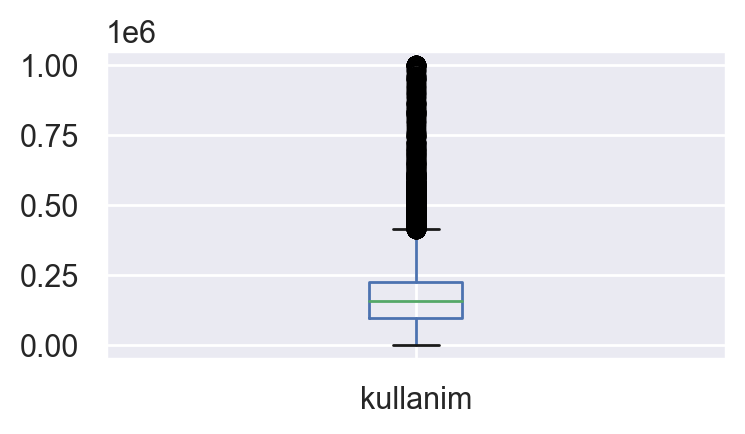

In [53]:
df['kullanim'].plot(kind='box')

In [54]:
Q1 = df.kullanim.quantile(0.25)  # birinci çeyreği aldık
Q3 = df.kullanim.quantile(0.75)
IQR = Q3 - Q1

#Q1, Q3, IQR

aykiri_Q3tenbuyuk = Q3 + 1.5*IQR 
aykiri_Q1denkucuk = Q1 - 1.5*IQR

aykiri_Q3tenbuyuk, aykiri_Q1denkucuk

(413500.0, -94500.0)

In [55]:
# mantıksal sınamanın true olduğu durumaları döndürür
np.where(df["kullanim"] > 413500.0)[0].shape , np.where(df["kullanim"] < -94500.0)[0].shape

((1956,), (0,))

In [56]:
# AYKIRI VERİLERİ SİLEREK YENİ BİR VERİ SETİ OLUŞTURDUK
# Koşulu belirleyelim (örneğin, fiyat 1594000'den büyük olanları bulalım)

kosul = ~(df["kullanim"] > 413500.0)

df = df.loc[kosul]

<AxesSubplot:>

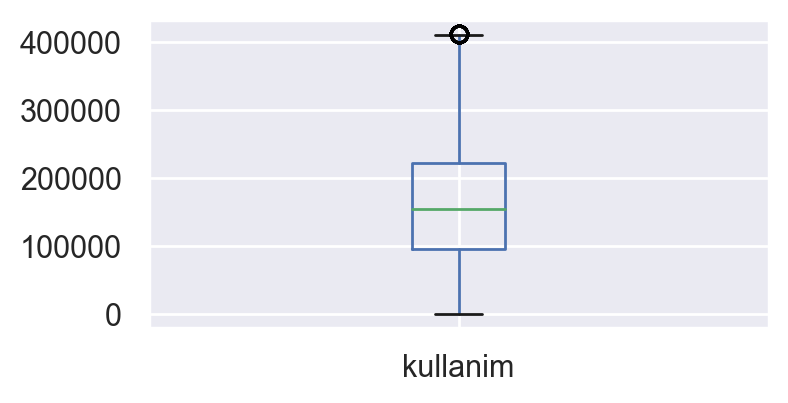

In [57]:
df['kullanim'].plot(kind='box')

In [58]:
df

,ilan_id,ilan_konumu,ilan_tarihi,model_yili,fiyat,model,motor_boyutu,motor_gucu,marka,seri,kullanim,yakit,sanziman_turu
0,1080850207,�stanbul,2023-05-26 09:23:29.000000,2016,830000.00,1.5 dCi Icon,1.50,110,Renault,Megane,143000,Dizel,Otomatik
1,1101850722,�zmir,2023-05-26 09:23:13.000000,2017,905000.00,1.5 dCi Icon,1.50,110,Renault,Megane,80000,Dizel,Otomatik
2,1101855061,Adana,2023-05-26 09:22:58.000000,2011,695000.00,A3 Sportback 1.6,1.60,102,Audi,A3,177000,Benzin & LPG,Manuel
3,1090594643,K�rklareli,2023-05-26 09:21:55.000000,2015,530000.00,1.4 TDI Trendline,1.40,75,Volkswagen,Polo,125000,Dizel,Manuel
4,1101862946,�zmir,2023-05-26 09:21:08.000000,2013,685000.00,1.5 dCi Icon,1.50,110,Renault,Megane,90500,Dizel,Otomatik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540142,1101864569,Tokat,2023-05-26 09:28:13.000000,2007,360000.00,1.4 Authentique,1.40,98,Renault,Megane,235000,Benzin & LPG,Manuel
540143,1101751328,�stanbul,2023-05-26 09:27:09.000000,2016,720000.00,1.2 TSI Lounge,1.20,90,Volkswagen,Polo,57000,Benzin,Otomatik
540144,1101865698,Bitlis,2023-05-26 09:26:38.000000,2015,469500.00,1.4 TDI Trendline,1.40,75,Volkswagen,Polo,205000,Dizel,Manuel
540145,1101865188,Ordu,2023-05-26 09:26:09.000000,2020,997500.00,1.5 Blue DCI Touch,1.50,115,Renault,Megane,22000,Dizel,Otomatik


In [59]:
df["fiyat"].describe()

count       498771.00
mean        778172.23
std       11039785.91
min              1.00
25%         345000.00
50%         529000.00
75%         765000.00
max     1480000000.00
Name: fiyat, dtype: float64

<AxesSubplot:>

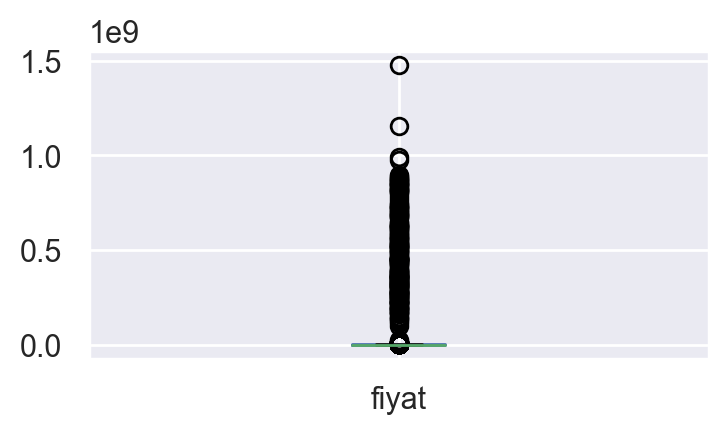

In [60]:
df['fiyat'].plot(kind='box')

In [61]:
Q1 = df.fiyat.quantile(0.25)  # birinci çeyreği aldık
Q3 = df.fiyat.quantile(0.75)
IQR = Q3 - Q1

#Q1, Q3, IQR

aykiri_Q3tenbuyuk = Q3 + 1.5*IQR 
aykiri_Q1denkucuk = Q1 - 1.5*IQR

aykiri_Q3tenbuyuk, aykiri_Q1denkucuk


(1395000.0, -285000.0)

In [62]:
# mantıksal sınamanın true olduğu durumaları döndürür
np.where(df["fiyat"] > 1395000.0)[0].shape , np.where(df["fiyat"] < -285000.0)[0].shape

((1454,), (0,))

In [63]:
# AYKIRI VERİLERİ SİLEREK YENİ BİR VERİ SETİ OLUŞTURDUK
# Koşulu belirleyelim (örneğin, fiyat 1594000'den büyük olanları bulalım)
kosul = ~(df["fiyat"] > 1395000.0)

df = df.loc[kosul]

In [64]:
df

,ilan_id,ilan_konumu,ilan_tarihi,model_yili,fiyat,model,motor_boyutu,motor_gucu,marka,seri,kullanim,yakit,sanziman_turu
0,1080850207,�stanbul,2023-05-26 09:23:29.000000,2016,830000.00,1.5 dCi Icon,1.50,110,Renault,Megane,143000,Dizel,Otomatik
1,1101850722,�zmir,2023-05-26 09:23:13.000000,2017,905000.00,1.5 dCi Icon,1.50,110,Renault,Megane,80000,Dizel,Otomatik
2,1101855061,Adana,2023-05-26 09:22:58.000000,2011,695000.00,A3 Sportback 1.6,1.60,102,Audi,A3,177000,Benzin & LPG,Manuel
3,1090594643,K�rklareli,2023-05-26 09:21:55.000000,2015,530000.00,1.4 TDI Trendline,1.40,75,Volkswagen,Polo,125000,Dizel,Manuel
4,1101862946,�zmir,2023-05-26 09:21:08.000000,2013,685000.00,1.5 dCi Icon,1.50,110,Renault,Megane,90500,Dizel,Otomatik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540142,1101864569,Tokat,2023-05-26 09:28:13.000000,2007,360000.00,1.4 Authentique,1.40,98,Renault,Megane,235000,Benzin & LPG,Manuel
540143,1101751328,�stanbul,2023-05-26 09:27:09.000000,2016,720000.00,1.2 TSI Lounge,1.20,90,Volkswagen,Polo,57000,Benzin,Otomatik
540144,1101865698,Bitlis,2023-05-26 09:26:38.000000,2015,469500.00,1.4 TDI Trendline,1.40,75,Volkswagen,Polo,205000,Dizel,Manuel
540145,1101865188,Ordu,2023-05-26 09:26:09.000000,2020,997500.00,1.5 Blue DCI Touch,1.50,115,Renault,Megane,22000,Dizel,Otomatik


<AxesSubplot:>

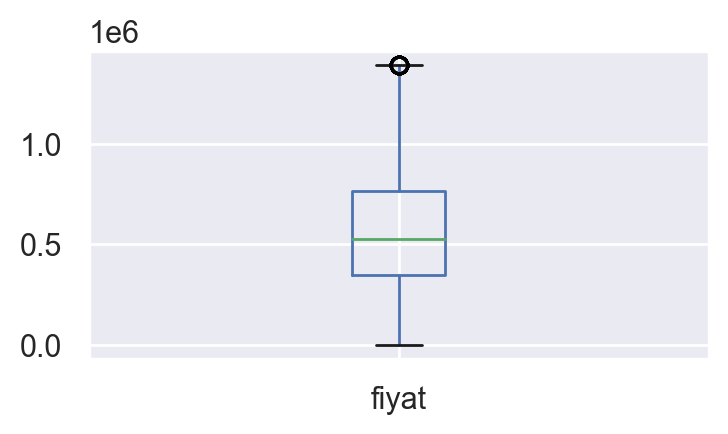

In [65]:
df['fiyat'].plot(kind='box')

In [66]:
#En yüksek fiyatlı araba fiyatlarına bakıyoruz
print(df.sort_values("fiyat",ascending=False).head(10))

           ilan_id ilan_konumu                 ilan_tarihi  model_yili  \
86405   1121134408    �stanbul  2023-10-03 12:59:07.000000        2016   
491197  1113684004       Bursa  2023-08-11 10:06:43.000000        2016   
487613  1117687057       Bursa  2023-08-10 19:10:30.000000        2018   
480034  1117329366       Tokat  2023-08-09 08:39:12.000000        2016   
101682  1118253414      Manisa  2023-10-12 22:25:04.000000        2020   
328742  1099521763       G�nen  2023-07-20 22:21:34.000000        2018   
82568   1127575409       �zmir  2023-09-30 07:42:20.000000        2016   
512742  1118878419      Manisa  2023-08-16 19:02:41.000000        2018   
140026  1050298663  �iftlikk�y  2023-06-10 12:06:41.000000        2017   
76718   1109013639       Sivas  2023-06-27 11:07:34.000000        2023   

            fiyat               model  motor_boyutu  motor_gucu    marka  \
86405  1395000.00    A3 Sedan 1.6 TDI          1.60         110     Audi   
491197 1395000.00    A3 Sedan 1.6

In [67]:
#En düşük fiyatlı araba fiyatlarına bakıyoruz
print(df.sort_values("fiyat",ascending=True).head(10))

           ilan_id    ilan_konumu                 ilan_tarihi  model_yili  \
442999  1050768444        Kayseri  2023-04-17 22:38:09.000000        2000   
371782  1088889338     Diyarbak�r  2023-03-29 01:27:06.000000        2000   
418664  1092247141  Kahramanmara�  2023-04-11 18:22:01.000000        1998   
256951  1054999066          Adana  2022-11-04 17:59:05.000000        2006   
909     1078092969            Van  2023-05-26 18:41:55.000000        2000   
443009  1093638320          Ayd�n  2023-04-17 21:28:43.000000        2001   
240306  1059354386        Trabzon  2022-10-24 19:32:07.000000        2004   
447111  1093977220          Ayd�n  2023-04-19 12:16:05.000000        2001   
462333  1094497302        Antalya  2023-04-23 06:07:39.000000        1997   
487502  1096857214         Samsun  2023-05-03 07:57:07.000000        1999   

        fiyat                 model  motor_boyutu  motor_gucu       marka  \
442999   1.00               1.6 RTE          1.60         110     Renault  

In [69]:
df

,ilan_id,ilan_konumu,ilan_tarihi,model_yili,fiyat,model,motor_boyutu,motor_gucu,marka,seri,kullanim,yakit,sanziman_turu
0,1080850207,�stanbul,2023-05-26 09:23:29.000000,2016,830000.00,1.5 dCi Icon,1.50,110,Renault,Megane,143000,Dizel,Otomatik
1,1101850722,�zmir,2023-05-26 09:23:13.000000,2017,905000.00,1.5 dCi Icon,1.50,110,Renault,Megane,80000,Dizel,Otomatik
2,1101855061,Adana,2023-05-26 09:22:58.000000,2011,695000.00,A3 Sportback 1.6,1.60,102,Audi,A3,177000,Benzin & LPG,Manuel
3,1090594643,K�rklareli,2023-05-26 09:21:55.000000,2015,530000.00,1.4 TDI Trendline,1.40,75,Volkswagen,Polo,125000,Dizel,Manuel
4,1101862946,�zmir,2023-05-26 09:21:08.000000,2013,685000.00,1.5 dCi Icon,1.50,110,Renault,Megane,90500,Dizel,Otomatik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540142,1101864569,Tokat,2023-05-26 09:28:13.000000,2007,360000.00,1.4 Authentique,1.40,98,Renault,Megane,235000,Benzin & LPG,Manuel
540143,1101751328,�stanbul,2023-05-26 09:27:09.000000,2016,720000.00,1.2 TSI Lounge,1.20,90,Volkswagen,Polo,57000,Benzin,Otomatik
540144,1101865698,Bitlis,2023-05-26 09:26:38.000000,2015,469500.00,1.4 TDI Trendline,1.40,75,Volkswagen,Polo,205000,Dizel,Manuel
540145,1101865188,Ordu,2023-05-26 09:26:09.000000,2020,997500.00,1.5 Blue DCI Touch,1.50,115,Renault,Megane,22000,Dizel,Otomatik


In [70]:
#kac tane araba var ona bakiyoruz
print(len(df))

497317


In [71]:
#ve bunun 100 de 1 ini alıyoruz

print(len(df)*0.01) 

4973.17


In [72]:
#Makinenin daha iyi ögrenmesi icin en pahalı 4973 aracı cikartiyoruz
df=df.sort_values("fiyat",ascending=False).iloc[4973:]

In [73]:
#Makinenin daha iyi ögrenmesi icin en ucuz 4973 aracı cikartiyoruz
df=df.sort_values("fiyat",ascending=True).iloc[4973:]

In [74]:
df

,ilan_id,ilan_konumu,ilan_tarihi,model_yili,fiyat,model,motor_boyutu,motor_gucu,marka,seri,kullanim,yakit,sanziman_turu
233693,1058713837,�zmir,2022-10-20 16:40:26.000000,2001,136750.00,1.6 RTE,1.60,110,Renault,Megane,295635,Benzin & LPG,Manuel
241074,1059441233,Diyarbak�r,2022-10-25 11:37:07.000000,2000,136750.00,1.6 RXi,1.60,110,Renault,Megane,189000,Benzin,Otomatik
212365,1056296855,Denizli,2022-10-07 13:23:03.000000,1999,136900.00,1.6 Classic,1.60,100,Volkswagen,Polo,219150,Benzin & LPG,Otomatik
228769,1039635080,Osmaniye,2022-10-17 18:49:15.000000,1999,136900.00,1.6 Comfortline Classic,1.60,100,Volkswagen,Polo,269000,Benzin & LPG,Manuel
214085,1056527207,�stanbul,2022-10-08 15:38:03.000000,1997,136950.00,A3 Hatchback 1.6,1.60,102,Audi,A3,315000,Benzin & LPG,Manuel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58679,1123633451,Antalya,2023-09-09 22:06:06.000000,2016,1250000.00,A3 Sportback 1.6 TDI,1.60,110,Audi,A3,125000,Dizel,Otomatik
93905,1126335054,�stanbul,2023-10-08 12:12:22.000000,2014,1250000.00,A3 Sedan 1.6 TDI,1.60,105,Audi,A3,127000,Dizel,Otomatik
160573,1125539108,Erzurum,2023-09-19 13:58:18.000000,2022,1250000.00,1.3 TCe Icon,1.30,140,Renault,Megane,10000,Benzin,Otomatik
39231,1122441534,Sakarya,2023-09-04 06:00:28.000000,2017,1250000.00,A3 Sedan 1.6 TDI,1.60,116,Audi,A3,138000,Dizel,Otomatik


In [76]:
#En yüksek fiyatlı araba fiyatlarına bakıyoruz
print(df.sort_values("fiyat",ascending=False).head(10))

           ilan_id ilan_konumu                 ilan_tarihi  model_yili  \
38772   1105663858    �stanbul  2023-06-12 08:43:10.000000        2016   
539189  1120433835       Konya  2023-08-24 15:11:47.000000        2019   
4728    1120756762     Isparta  2023-08-26 10:20:20.000000        2016   
97469   1129503958   �anakkale  2023-10-10 12:56:10.000000        2015   
209130  1126057777      Ankara  2023-09-22 08:07:25.000000        2015   
94159   1129105786      Ankara  2023-10-08 14:39:09.000000        2018   
273176  1112677441       �zmir  2023-07-15 17:41:35.000000        2020   
270677  1112601308   Gaziantep  2023-07-15 10:18:17.000000        2016   
61573   1123783277         Van  2023-09-10 19:38:10.000000        2020   
459364  1115385684      K�yler  2023-07-30 11:05:20.000000        2020   

            fiyat                 model  motor_boyutu  motor_gucu    marka  \
38772  1250000.00      A3 Sedan 1.6 TDI          1.60         110     Audi   
539189 1250000.00    1.5 Blue

In [77]:
#En düşük fiyatlı araba fiyatlarına bakıyoruz
print(df.sort_values("fiyat",ascending=True).head(10))

           ilan_id ilan_konumu                 ilan_tarihi  model_yili  \
233693  1058713837       �zmir  2022-10-20 16:40:26.000000        2001   
241074  1059441233  Diyarbak�r  2022-10-25 11:37:07.000000        2000   
212365  1056296855     Denizli  2022-10-07 13:23:03.000000        1999   
228769  1039635080    Osmaniye  2022-10-17 18:49:15.000000        1999   
214085  1056527207    �stanbul  2022-10-08 15:38:03.000000        1997   
349662  1066311458  Diyarbak�r  2022-12-06 13:07:10.000000        2002   
247100  1060087957     Antalya  2022-10-29 12:14:31.000000        1998   
195490  1054447981     Kocaeli  2022-09-29 11:26:46.000000        1997   
250992  1060507960       Konya  2022-11-01 07:01:33.000000        1997   
236807  1059005439      Ankara  2022-10-22 15:04:45.000000        1998   

           fiyat                    model  motor_boyutu  motor_gucu  \
233693 136750.00                  1.6 RTE          1.60         110   
241074 136750.00                  1.6 RXi  

<AxesSubplot:>

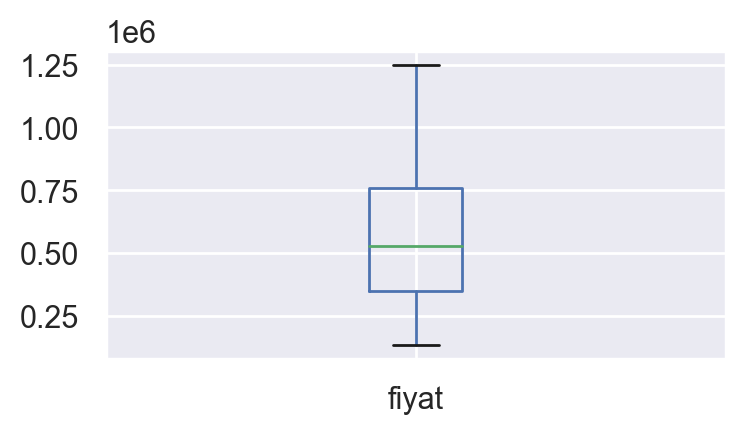

In [78]:
df['fiyat'].plot(kind='box')

In [79]:
#Datamızda yılara göre araçlara bakıyoruz geneli bozacak şeyler var mı diye
print(df.groupby("model_yili").mean()["fiyat"])

# Uyumsuz yıllar çıksaydı o yılları silerdil
#df4=df4[df4.model_yili!=1982] # gerek yok bunda

model_yili
1994    197500.00
1995    207204.54
1996    211227.15
1997    221832.54
1998    225264.43
1999    229765.32
2000    256181.34
2001    264139.24
2002    286888.80
2003    294510.21
2004    326106.74
2005    329826.69
2006    349091.90
2007    354084.78
2008    359547.67
2009    399117.89
2010    455099.08
2011    477904.60
2012    508057.26
2013    563262.01
2014    631391.83
2015    681190.80
2016    696227.88
2017    708545.82
2018    747284.79
2019    779553.12
2020    826266.49
2021    833436.42
2022    942426.71
2023   1114242.22
Name: fiyat, dtype: float64


In [81]:
df.shape

(487371, 13)

In [80]:
df

,ilan_id,ilan_konumu,ilan_tarihi,model_yili,fiyat,model,motor_boyutu,motor_gucu,marka,seri,kullanim,yakit,sanziman_turu
233693,1058713837,�zmir,2022-10-20 16:40:26.000000,2001,136750.00,1.6 RTE,1.60,110,Renault,Megane,295635,Benzin & LPG,Manuel
241074,1059441233,Diyarbak�r,2022-10-25 11:37:07.000000,2000,136750.00,1.6 RXi,1.60,110,Renault,Megane,189000,Benzin,Otomatik
212365,1056296855,Denizli,2022-10-07 13:23:03.000000,1999,136900.00,1.6 Classic,1.60,100,Volkswagen,Polo,219150,Benzin & LPG,Otomatik
228769,1039635080,Osmaniye,2022-10-17 18:49:15.000000,1999,136900.00,1.6 Comfortline Classic,1.60,100,Volkswagen,Polo,269000,Benzin & LPG,Manuel
214085,1056527207,�stanbul,2022-10-08 15:38:03.000000,1997,136950.00,A3 Hatchback 1.6,1.60,102,Audi,A3,315000,Benzin & LPG,Manuel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58679,1123633451,Antalya,2023-09-09 22:06:06.000000,2016,1250000.00,A3 Sportback 1.6 TDI,1.60,110,Audi,A3,125000,Dizel,Otomatik
93905,1126335054,�stanbul,2023-10-08 12:12:22.000000,2014,1250000.00,A3 Sedan 1.6 TDI,1.60,105,Audi,A3,127000,Dizel,Otomatik
160573,1125539108,Erzurum,2023-09-19 13:58:18.000000,2022,1250000.00,1.3 TCe Icon,1.30,140,Renault,Megane,10000,Benzin,Otomatik
39231,1122441534,Sakarya,2023-09-04 06:00:28.000000,2017,1250000.00,A3 Sedan 1.6 TDI,1.60,116,Audi,A3,138000,Dizel,Otomatik


In [82]:
df.corr()

,ilan_id,model_yili,fiyat,motor_boyutu,motor_gucu,kullanim
ilan_id,1.00,-0.03,0.34,-0.02,-0.00,0.05
model_yili,-0.03,1.00,0.76,-0.33,0.49,-0.71
fiyat,0.34,0.76,1.00,-0.13,0.49,-0.60
motor_boyutu,-0.02,-0.33,-0.13,1.00,0.07,0.34
motor_gucu,-0.00,0.49,0.49,0.07,1.00,-0.42
kullanim,0.05,-0.71,-0.60,0.34,-0.42,1.00


In [83]:
print(df.corr()["fiyat"].sort_values())

kullanim       -0.60
motor_boyutu   -0.13
ilan_id         0.34
motor_gucu      0.49
model_yili      0.76
fiyat           1.00
Name: fiyat, dtype: float64


In [84]:
# AYKIRI VERİLER SİLİNDİ#
import pandas as pd


dfx = pd.DataFrame(df)

# DataFrame'i CSV dosyasına aktarma
dfx.to_csv('genel_arac_verileri_aykiri_veri_yok.csv', index=False)


In [85]:
# ÖZNİTELİK SEÇİMİ VE MÜHENDİSLİĞİ

In [86]:
# İSTENMEYEN SÜTRUNLARI KALDIRMA #
import pandas as pd
import numpy as np

# CSV dosyasını yükle
df = pd.read_csv('genel_arac_verileri_aykiri_veri_yok.csv')

In [87]:
df

,ilan_id,ilan_konumu,ilan_tarihi,model_yili,fiyat,model,motor_boyutu,motor_gucu,marka,seri,kullanim,yakit,sanziman_turu
0,1058713837,�zmir,2022-10-20 16:40:26.000000,2001,136750.00,1.6 RTE,1.60,110,Renault,Megane,295635,Benzin & LPG,Manuel
1,1059441233,Diyarbak�r,2022-10-25 11:37:07.000000,2000,136750.00,1.6 RXi,1.60,110,Renault,Megane,189000,Benzin,Otomatik
2,1056296855,Denizli,2022-10-07 13:23:03.000000,1999,136900.00,1.6 Classic,1.60,100,Volkswagen,Polo,219150,Benzin & LPG,Otomatik
3,1039635080,Osmaniye,2022-10-17 18:49:15.000000,1999,136900.00,1.6 Comfortline Classic,1.60,100,Volkswagen,Polo,269000,Benzin & LPG,Manuel
4,1056527207,�stanbul,2022-10-08 15:38:03.000000,1997,136950.00,A3 Hatchback 1.6,1.60,102,Audi,A3,315000,Benzin & LPG,Manuel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487366,1123633451,Antalya,2023-09-09 22:06:06.000000,2016,1250000.00,A3 Sportback 1.6 TDI,1.60,110,Audi,A3,125000,Dizel,Otomatik
487367,1126335054,�stanbul,2023-10-08 12:12:22.000000,2014,1250000.00,A3 Sedan 1.6 TDI,1.60,105,Audi,A3,127000,Dizel,Otomatik
487368,1125539108,Erzurum,2023-09-19 13:58:18.000000,2022,1250000.00,1.3 TCe Icon,1.30,140,Renault,Megane,10000,Benzin,Otomatik
487369,1122441534,Sakarya,2023-09-04 06:00:28.000000,2017,1250000.00,A3 Sedan 1.6 TDI,1.60,116,Audi,A3,138000,Dizel,Otomatik


In [88]:
# Her bir satır için aynı işlemi uygulayan bir fonksiyon oluşturalım

def islem_satir(row):
    return 2023 - row['model_yili'] 

df['arac_yasi'] = df.apply(islem_satir, axis=1)


In [89]:
df

,ilan_id,ilan_konumu,ilan_tarihi,model_yili,fiyat,model,motor_boyutu,motor_gucu,marka,seri,kullanim,yakit,sanziman_turu,arac_yasi
0,1058713837,�zmir,2022-10-20 16:40:26.000000,2001,136750.00,1.6 RTE,1.60,110,Renault,Megane,295635,Benzin & LPG,Manuel,22
1,1059441233,Diyarbak�r,2022-10-25 11:37:07.000000,2000,136750.00,1.6 RXi,1.60,110,Renault,Megane,189000,Benzin,Otomatik,23
2,1056296855,Denizli,2022-10-07 13:23:03.000000,1999,136900.00,1.6 Classic,1.60,100,Volkswagen,Polo,219150,Benzin & LPG,Otomatik,24
3,1039635080,Osmaniye,2022-10-17 18:49:15.000000,1999,136900.00,1.6 Comfortline Classic,1.60,100,Volkswagen,Polo,269000,Benzin & LPG,Manuel,24
4,1056527207,�stanbul,2022-10-08 15:38:03.000000,1997,136950.00,A3 Hatchback 1.6,1.60,102,Audi,A3,315000,Benzin & LPG,Manuel,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487366,1123633451,Antalya,2023-09-09 22:06:06.000000,2016,1250000.00,A3 Sportback 1.6 TDI,1.60,110,Audi,A3,125000,Dizel,Otomatik,7
487367,1126335054,�stanbul,2023-10-08 12:12:22.000000,2014,1250000.00,A3 Sedan 1.6 TDI,1.60,105,Audi,A3,127000,Dizel,Otomatik,9
487368,1125539108,Erzurum,2023-09-19 13:58:18.000000,2022,1250000.00,1.3 TCe Icon,1.30,140,Renault,Megane,10000,Benzin,Otomatik,1
487369,1122441534,Sakarya,2023-09-04 06:00:28.000000,2017,1250000.00,A3 Sedan 1.6 TDI,1.60,116,Audi,A3,138000,Dizel,Otomatik,6


In [90]:
# Her bir satır için aynı işlemi uygulayan bir fonksiyon oluşturalım

from datetime import datetime   # ilan_tarihi
def islem_satir(row):
    saatsiz_ilan_tarihi = row["ilan_tarihi"].split(" ")[0] # saatleri dikkate alınmadı #
    # Stringi datetime nesnesine dönüştürme
    tarih = datetime.strptime(saatsiz_ilan_tarihi, "%Y-%m-%d")     
    #bugun = datetime.now() # her gün ddegişirdi
    bugun = datetime(2023,11,10)  # sabit bi gun verildi 
    kac_gun = bugun - tarih
    kac_gun_ilanda = kac_gun.days

    return kac_gun_ilanda

df['kac_gun_ilanda'] = df.apply(islem_satir, axis=1)

In [91]:
df

,ilan_id,ilan_konumu,ilan_tarihi,model_yili,fiyat,model,motor_boyutu,motor_gucu,marka,seri,kullanim,yakit,sanziman_turu,arac_yasi,kac_gun_ilanda
0,1058713837,�zmir,2022-10-20 16:40:26.000000,2001,136750.00,1.6 RTE,1.60,110,Renault,Megane,295635,Benzin & LPG,Manuel,22,386
1,1059441233,Diyarbak�r,2022-10-25 11:37:07.000000,2000,136750.00,1.6 RXi,1.60,110,Renault,Megane,189000,Benzin,Otomatik,23,381
2,1056296855,Denizli,2022-10-07 13:23:03.000000,1999,136900.00,1.6 Classic,1.60,100,Volkswagen,Polo,219150,Benzin & LPG,Otomatik,24,399
3,1039635080,Osmaniye,2022-10-17 18:49:15.000000,1999,136900.00,1.6 Comfortline Classic,1.60,100,Volkswagen,Polo,269000,Benzin & LPG,Manuel,24,389
4,1056527207,�stanbul,2022-10-08 15:38:03.000000,1997,136950.00,A3 Hatchback 1.6,1.60,102,Audi,A3,315000,Benzin & LPG,Manuel,26,398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487366,1123633451,Antalya,2023-09-09 22:06:06.000000,2016,1250000.00,A3 Sportback 1.6 TDI,1.60,110,Audi,A3,125000,Dizel,Otomatik,7,62
487367,1126335054,�stanbul,2023-10-08 12:12:22.000000,2014,1250000.00,A3 Sedan 1.6 TDI,1.60,105,Audi,A3,127000,Dizel,Otomatik,9,33
487368,1125539108,Erzurum,2023-09-19 13:58:18.000000,2022,1250000.00,1.3 TCe Icon,1.30,140,Renault,Megane,10000,Benzin,Otomatik,1,52
487369,1122441534,Sakarya,2023-09-04 06:00:28.000000,2017,1250000.00,A3 Sedan 1.6 TDI,1.60,116,Audi,A3,138000,Dizel,Otomatik,6,67


In [92]:
df["arac_yasi"].describe()

count   487371.00
mean        10.86
std          6.48
min          0.00
25%          6.00
50%         10.00
75%         16.00
max         29.00
Name: arac_yasi, dtype: float64

<AxesSubplot:>

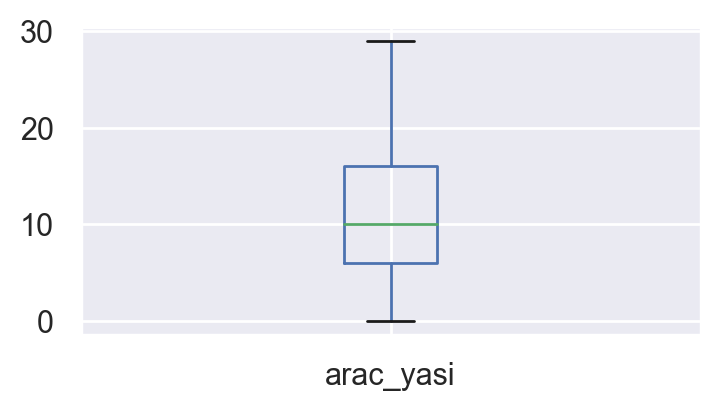

In [93]:
df['arac_yasi'].plot(kind='box')

In [94]:
df["kac_gun_ilanda"].describe()

count   487371.00
mean       204.46
std        117.96
min         19.00
25%        106.00
50%        191.00
75%        297.00
max        770.00
Name: kac_gun_ilanda, dtype: float64

<AxesSubplot:>

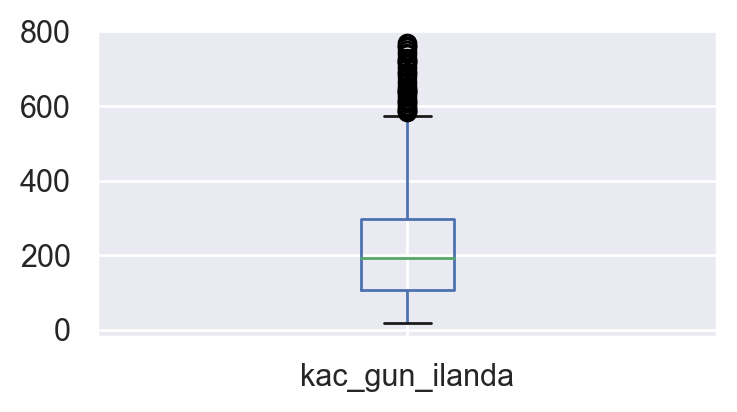

In [95]:
df['kac_gun_ilanda'].plot(kind='box')

In [96]:
Q1 = df.kac_gun_ilanda.quantile(0.25)  # birinci çeyreği aldık
Q3 = df.kac_gun_ilanda.quantile(0.75)
IQR = Q3 - Q1

#Q1, Q3, IQR

aykiri_Q3tenbuyuk = Q3 + 1.5*IQR 
aykiri_Q1denkucuk = Q1 - 1.5*IQR

aykiri_Q3tenbuyuk, aykiri_Q1denkucuk


(583.5, -180.5)

In [97]:

# mantıksal sınamanın true olduğu durumaları döndürür
np.where(df["kac_gun_ilanda"] > 583.5)[0].shape , np.where(df["kac_gun_ilanda"] < -180.5)[0].shape


((52,), (0,))

In [99]:
# Koşulu belirleyelim 
kosul = ~(df["kac_gun_ilanda"] > 583.5)

df = df.loc[kosul]

<AxesSubplot:>

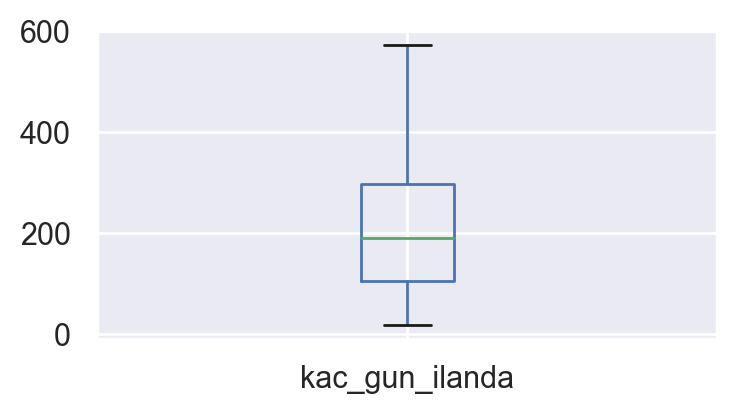

In [100]:
df['kac_gun_ilanda'].plot(kind='box')

In [101]:
df.corr()

,ilan_id,model_yili,fiyat,motor_boyutu,motor_gucu,kullanim,arac_yasi,kac_gun_ilanda
ilan_id,1.00,-0.03,0.34,-0.02,-0.00,0.05,0.03,-0.78
model_yili,-0.03,1.00,0.76,-0.33,0.49,-0.71,-1.00,-0.01
fiyat,0.34,0.76,1.00,-0.13,0.49,-0.60,-0.76,-0.47
motor_boyutu,-0.02,-0.33,-0.13,1.00,0.07,0.34,0.33,0.03
motor_gucu,-0.00,0.49,0.49,0.07,1.00,-0.42,-0.49,-0.02
kullanim,0.05,-0.71,-0.60,0.34,-0.42,1.00,0.71,-0.03
arac_yasi,0.03,-1.00,-0.76,0.33,-0.49,0.71,1.00,0.01
kac_gun_ilanda,-0.78,-0.01,-0.47,0.03,-0.02,-0.03,0.01,1.00


In [102]:
def islem_satir(row):
    return (row["arac_yasi"] * row['kullanim'])/1000

df['yipranma_degeri'] = df.apply(islem_satir, axis=1)

C:\Users\HP\AppData\Local\Temp\ipykernel_16892\2318101652.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yipranma_degeri'] = df.apply(islem_satir, axis=1)


In [103]:
df

,ilan_id,ilan_konumu,ilan_tarihi,model_yili,fiyat,model,motor_boyutu,motor_gucu,marka,seri,kullanim,yakit,sanziman_turu,arac_yasi,kac_gun_ilanda,yipranma_degeri
0,1058713837,�zmir,2022-10-20 16:40:26.000000,2001,136750.00,1.6 RTE,1.60,110,Renault,Megane,295635,Benzin & LPG,Manuel,22,386,6503.97
1,1059441233,Diyarbak�r,2022-10-25 11:37:07.000000,2000,136750.00,1.6 RXi,1.60,110,Renault,Megane,189000,Benzin,Otomatik,23,381,4347.00
2,1056296855,Denizli,2022-10-07 13:23:03.000000,1999,136900.00,1.6 Classic,1.60,100,Volkswagen,Polo,219150,Benzin & LPG,Otomatik,24,399,5259.60
3,1039635080,Osmaniye,2022-10-17 18:49:15.000000,1999,136900.00,1.6 Comfortline Classic,1.60,100,Volkswagen,Polo,269000,Benzin & LPG,Manuel,24,389,6456.00
4,1056527207,�stanbul,2022-10-08 15:38:03.000000,1997,136950.00,A3 Hatchback 1.6,1.60,102,Audi,A3,315000,Benzin & LPG,Manuel,26,398,8190.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487366,1123633451,Antalya,2023-09-09 22:06:06.000000,2016,1250000.00,A3 Sportback 1.6 TDI,1.60,110,Audi,A3,125000,Dizel,Otomatik,7,62,875.00
487367,1126335054,�stanbul,2023-10-08 12:12:22.000000,2014,1250000.00,A3 Sedan 1.6 TDI,1.60,105,Audi,A3,127000,Dizel,Otomatik,9,33,1143.00
487368,1125539108,Erzurum,2023-09-19 13:58:18.000000,2022,1250000.00,1.3 TCe Icon,1.30,140,Renault,Megane,10000,Benzin,Otomatik,1,52,10.00
487369,1122441534,Sakarya,2023-09-04 06:00:28.000000,2017,1250000.00,A3 Sedan 1.6 TDI,1.60,116,Audi,A3,138000,Dizel,Otomatik,6,67,828.00


In [104]:
df["yipranma_degeri"].describe()

count   487319.00
mean      2126.68
std       1964.23
min          0.00
25%        600.00
50%       1380.00
75%       3388.00
max      10836.00
Name: yipranma_degeri, dtype: float64

<AxesSubplot:>

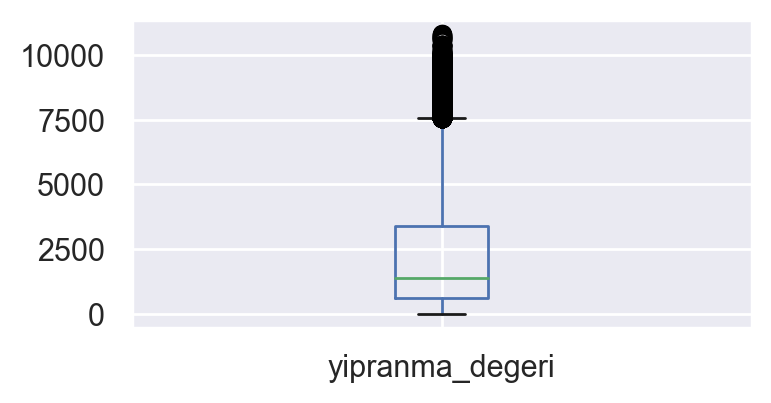

In [105]:
df['yipranma_degeri'].plot(kind='box')

In [111]:
Q1 = df.yipranma_degeri.quantile(0.25)  # birinci çeyreği aldık
Q3 = df.yipranma_degeri.quantile(0.75)
IQR = Q3 - Q1

#Q1, Q3, IQR

aykiri_Q3tenbuyuk = Q3 + 1.5*IQR 
aykiri_Q1denkucuk = Q1 - 1.5*IQR

aykiri_Q3tenbuyuk, aykiri_Q1denkucuk


(7271.8125, -3415.8875000000003)

In [113]:

# mantıksal sınamanın true olduğu durumaları döndürür
np.where(df["yipranma_degeri"] > 7271.8125)[0].shape , np.where(df["yipranma_degeri"] < -3582.0)[0].shape

((571,), (0,))

In [114]:
# Koşulu belirleyelim 
kosul = ~(df["yipranma_degeri"] > 7271.8125)

df = df.loc[kosul]

<AxesSubplot:>

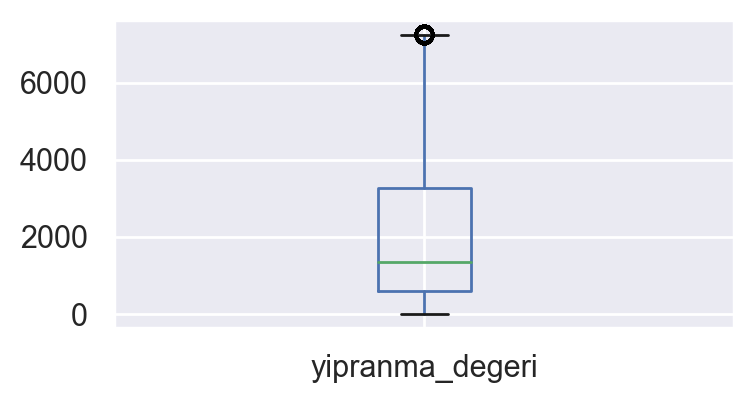

In [115]:
df['yipranma_degeri'].plot(kind='box')

In [116]:
df

,ilan_id,ilan_konumu,ilan_tarihi,model_yili,fiyat,model,motor_boyutu,motor_gucu,marka,seri,kullanim,yakit,sanziman_turu,arac_yasi,kac_gun_ilanda,yipranma_degeri
0,1058713837,�zmir,2022-10-20 16:40:26.000000,2001,136750.00,1.6 RTE,1.60,110,Renault,Megane,295635,Benzin & LPG,Manuel,22,386,6503.97
1,1059441233,Diyarbak�r,2022-10-25 11:37:07.000000,2000,136750.00,1.6 RXi,1.60,110,Renault,Megane,189000,Benzin,Otomatik,23,381,4347.00
2,1056296855,Denizli,2022-10-07 13:23:03.000000,1999,136900.00,1.6 Classic,1.60,100,Volkswagen,Polo,219150,Benzin & LPG,Otomatik,24,399,5259.60
3,1039635080,Osmaniye,2022-10-17 18:49:15.000000,1999,136900.00,1.6 Comfortline Classic,1.60,100,Volkswagen,Polo,269000,Benzin & LPG,Manuel,24,389,6456.00
5,1066311458,Diyarbak�r,2022-12-06 13:07:10.000000,2002,136950.00,1.4 Expression,1.40,95,Renault,Megane,340000,Benzin & LPG,Manuel,21,339,7140.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487366,1123633451,Antalya,2023-09-09 22:06:06.000000,2016,1250000.00,A3 Sportback 1.6 TDI,1.60,110,Audi,A3,125000,Dizel,Otomatik,7,62,875.00
487367,1126335054,�stanbul,2023-10-08 12:12:22.000000,2014,1250000.00,A3 Sedan 1.6 TDI,1.60,105,Audi,A3,127000,Dizel,Otomatik,9,33,1143.00
487368,1125539108,Erzurum,2023-09-19 13:58:18.000000,2022,1250000.00,1.3 TCe Icon,1.30,140,Renault,Megane,10000,Benzin,Otomatik,1,52,10.00
487369,1122441534,Sakarya,2023-09-04 06:00:28.000000,2017,1250000.00,A3 Sedan 1.6 TDI,1.60,116,Audi,A3,138000,Dizel,Otomatik,6,67,828.00


In [118]:
# YENİ CSV DOSYASINA AKTARDIM Kİ GÖRSELLEŞTİRME DİREK BU DOSYADAN ÇEKİLSİN #

import pandas as pd

dfx = pd.DataFrame(df)

dfx.to_csv('genel_arac_verileri_gorsellestirme_icin.csv', index=False)


In [119]:
df.corr()

,ilan_id,model_yili,fiyat,motor_boyutu,motor_gucu,kullanim,arac_yasi,kac_gun_ilanda,yipranma_degeri
ilan_id,1.00,-0.02,0.35,-0.02,0.00,0.04,0.02,-0.78,0.04
model_yili,-0.02,1.00,0.75,-0.31,0.49,-0.69,-1.00,-0.02,-0.91
fiyat,0.35,0.75,1.00,-0.12,0.49,-0.59,-0.75,-0.48,-0.70
motor_boyutu,-0.02,-0.31,-0.12,1.00,0.08,0.33,0.31,0.03,0.31
motor_gucu,0.00,0.49,0.49,0.08,1.00,-0.42,-0.49,-0.02,-0.39
kullanim,0.04,-0.69,-0.59,0.33,-0.42,1.00,0.69,-0.02,0.86
arac_yasi,0.02,-1.00,-0.75,0.31,-0.49,0.69,1.00,0.02,0.91
kac_gun_ilanda,-0.78,-0.02,-0.48,0.03,-0.02,-0.02,0.02,1.00,-0.00
yipranma_degeri,0.04,-0.91,-0.70,0.31,-0.39,0.86,0.91,-0.00,1.00


In [120]:
print(df.corr()["fiyat"].sort_values())

arac_yasi         -0.75
yipranma_degeri   -0.70
kullanim          -0.59
kac_gun_ilanda    -0.48
motor_boyutu      -0.12
ilan_id            0.35
motor_gucu         0.49
model_yili         0.75
fiyat              1.00
Name: fiyat, dtype: float64


In [121]:
df = df.drop(columns="ilan_id") # istediğimiz sütunu silme
df = df.drop(columns="ilan_konumu")
df = df.drop(columns="ilan_tarihi")
df = df.drop(columns="model")
df = df.drop(columns="marka")
df = df.drop(columns="seri")
df = df.drop(columns="yakit")
df = df.drop(columns="sanziman_turu")

In [122]:
df

,model_yili,fiyat,motor_boyutu,motor_gucu,kullanim,arac_yasi,kac_gun_ilanda,yipranma_degeri
0,2001,136750.00,1.60,110,295635,22,386,6503.97
1,2000,136750.00,1.60,110,189000,23,381,4347.00
2,1999,136900.00,1.60,100,219150,24,399,5259.60
3,1999,136900.00,1.60,100,269000,24,389,6456.00
5,2002,136950.00,1.40,95,340000,21,339,7140.00
...,...,...,...,...,...,...,...,...
487366,2016,1250000.00,1.60,110,125000,7,62,875.00
487367,2014,1250000.00,1.60,105,127000,9,33,1143.00
487368,2022,1250000.00,1.30,140,10000,1,52,10.00
487369,2017,1250000.00,1.60,116,138000,6,67,828.00


In [123]:
# EĞİTİM İÇİN KAYDEDİLİR #

import pandas as pd

dfx = pd.DataFrame(df)

# DataFrame'i CSV dosyasına aktarma
dfx.to_csv('genel_arac_verileri_egitim_icin.csv', index=False)